In [56]:
import numpy as np
import matplotlib.pyplot as plt
import csv

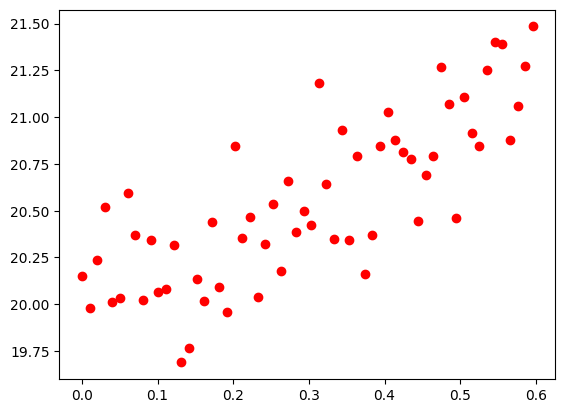

In [57]:
x_train: list[float] = []
y_train: list[float] = []

with open('lab_1_train.csv', 'r') as csv_train:
    rows = csv.reader(csv_train, delimiter = ',')

    next(rows)

    for row in rows:
        x_train.append(float(row[1]))
        y_train.append(float(row[2]))

plt.scatter(x_train, y_train, marker = "o", color = "r")
plt.show()

In [58]:
def predict(m: float, c: float, x: list[float]) -> float:
    return m * x + c

def mse(m: float, c: float, x: list[float], y: list[float]) -> float:
    points_num = len(x)

    return sum((predict(m, c, x[i]) - y[i]) ** 2 for i in range(points_num)) / float(points_num)

def fit(x: list[float], y: list[float]) -> tuple[float, float]:
    weight = 0.0
    offset = 0.0
    old_loss = 0.0
    new_loss = 10.0
    eps = 0.00001
    learning_rate = 0.01
    points_num = len(x)

    while (abs(new_loss - old_loss) > eps):
        gradient_m = 2 / points_num * sum((predict(weight, offset, x[i]) - y[i]) * x[i] for i in range(points_num))
        gradient_c = 2 / points_num * sum(predict(weight, offset, x[i]) - y[i] for i in range(points_num))

        weight -= learning_rate * gradient_m
        offset -= learning_rate * gradient_c

        old_loss = new_loss
        new_loss = mse(weight, offset, x, y)

        print(f"m = {weight}, c = {offset}, loss = {new_loss}")

    return (weight, offset)

In [59]:
m, c = fit(x_train, y_train)

m = 0.12367813465364869, c = 0.41099126382076906, loss = 404.25742497676725
m = 0.24461160240278607, c = 0.8130256306535506, loss = 386.82412434421605
m = 0.3628603365917162, c = 1.2062985955438985, loss = 370.14353312529073
m = 0.4784829623813285, c = 1.59100138645794, loss = 354.1831510696294
m = 0.5915368253029152, c = 1.967321057420207, loss = 338.91188121343606
m = 0.7020780191887422, c = 2.335440579618544, loss = 324.2999692887721
m = 0.8101614134929777, c = 2.695538930520464, loss = 310.3189457490135
m = 0.9158406800162845, c = 3.0477911810443503, loss = 296.9415702975205
m = 1.019168319047094, c = 3.3923685808279735, loss = 284.14177881142933
m = 1.120195684932291, c = 3.729438641635842, loss = 271.8946325571541
m = 1.2189730110897676, c = 4.059165218946015, loss = 260.17626959864873
m = 1.3155494344750247, c = 4.381708591756117, loss = 248.96385830374842
m = 1.409973019513739, c = 4.697225540647417, loss = 238.2355528579993
m = 1.5022907815119544, c = 5.005869424145004, loss =

In [60]:
x_test: list[float] = []
y_test: list[float] = []

with open('lab_1_test.csv', 'r') as csv_test:
    rows = csv.reader(csv_test, delimiter = ',')

    next(rows)

    for row in rows:
        x_test.append(float(row[1]))
        y_test.append(float(row[2]))

print(f"Test data loss = {mse(m, c, x_test, y_test)}")

Test data loss = 0.12658712974524994


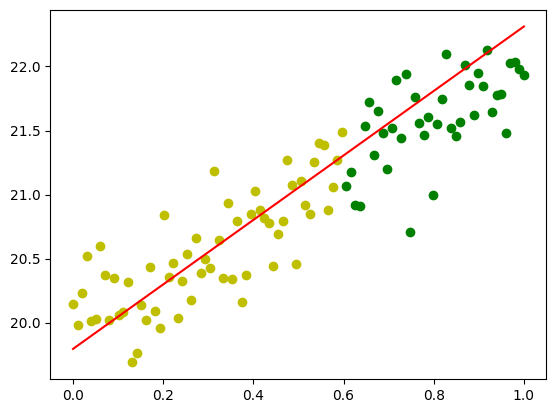

In [61]:
x_all: list[float] = x_train.copy()
x_all.extend(x_test)

y_all: list[float] = y_train.copy()
y_all.extend(y_test)

plt.scatter(x_train, y_train, color = "y")
plt.scatter(x_test, y_test, color = "g")
plt.plot([x_all[0], x_all[-1]], [predict(m, c, x_all[0]), predict(m, c, x_all[-1])], color='r')
plt.show()